In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
!pip install plotly


In [3]:
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import random as rand
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from scipy.special import betainc
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import time
import numpy as np
import colorsys

from matplotlib.tri import Triangulation

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [4]:
def f(x,y,a,b):
    return (x**2)/(a**2) + (y**2)/(b**2)

In [21]:

t = np.linspace(-100, 100, 100)
x, y = np.meshgrid(t,t)
z = f(x, y, 1, 1)



[[20000.         19600.04081216 19208.24405673 ... 19208.24405673
  19600.04081216 20000.        ]
 [19600.04081216 19200.08162432 18808.28486889 ... 18808.28486889
  19200.08162432 19600.04081216]
 [19208.24405673 18808.28486889 18416.48811346 ... 18416.48811346
  18808.28486889 19208.24405673]
 ...
 [19208.24405673 18808.28486889 18416.48811346 ... 18416.48811346
  18808.28486889 19208.24405673]
 [19600.04081216 19200.08162432 18808.28486889 ... 18808.28486889
  19200.08162432 19600.04081216]
 [20000.         19600.04081216 19208.24405673 ... 19208.24405673
  19600.04081216 20000.        ]]


In [4]:
def vol_par_n_dim_3(iterations, a, b):
    count_in_par = 0
    points_in_par = []
    for count_loops in range(iterations):
        x = np.random.uniform(-100, 100)
        y = np.random.uniform(-100, 100)
        z = np.random.uniform(-2000, 2000)
        if z > (x**2)/(a**2) + (y**2)/(b**2):
            count_in_par += 1
            points_in_par.append((x, y, z))
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    for point in points_in_par:
        ax.scatter(point[0], point[1], point[2], color = 'orange')
        
    return 200*200*4000*(count_in_par / iterations)


<IPython.core.display.Javascript object>


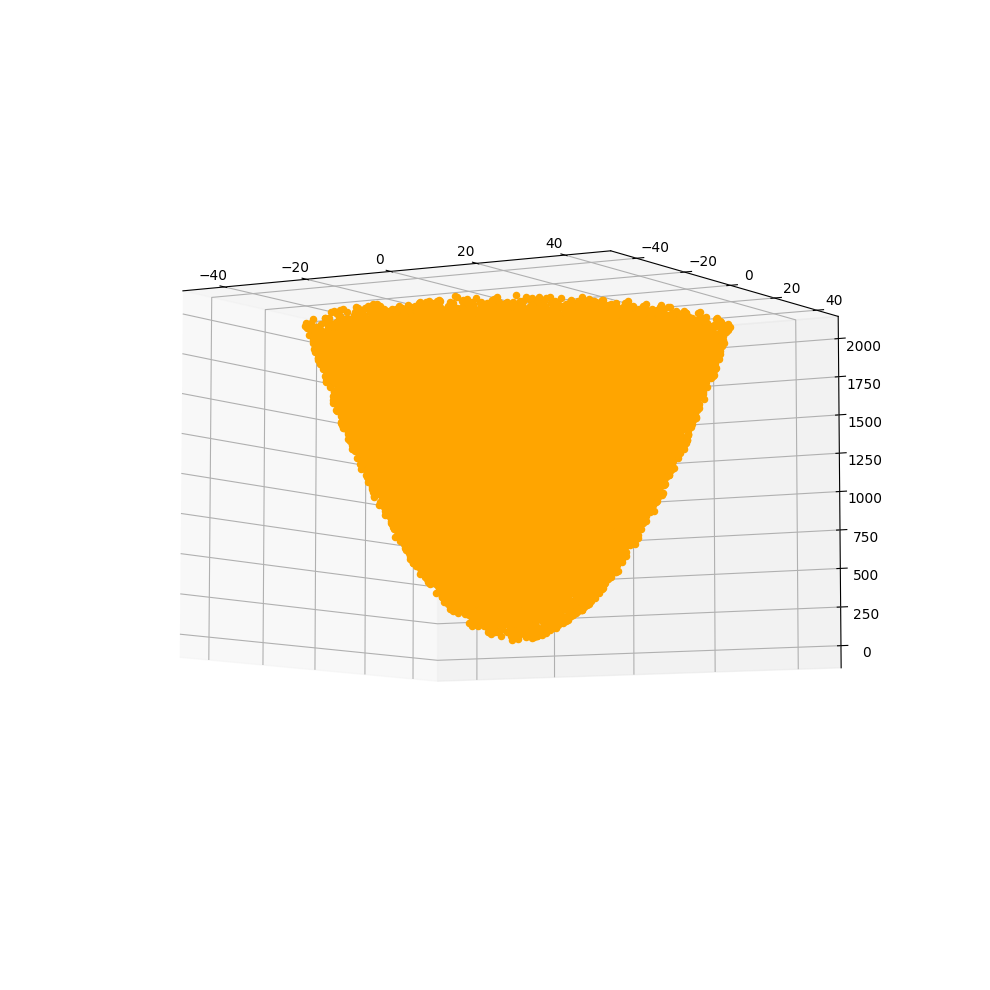

6280800.0

In [27]:
vol_par_n_dim_3(1000000, 1, 1)

In [32]:
h = 2000
R = math.sqrt(h) #ici p = 1/2 car a=b=1
vol = (1/2)*(np.pi)*(R**2)*h
vol

6283185.307179587

In [4]:
def par_Psn_uniforme_dim_3(a_, b_, epsilon, rayon, iterations, draw):
    if draw:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca(projection='3d')
    
    count_in_sphere = 0
    points_in_sphere = []
    count_in_par = 0
    points_in_par = []
    
    for count_loops in range(iterations):
        point = np.random.uniform(-rayon, rayon, 3)
        norm = np.linalg.norm(point)
        if norm < rayon:
            points_in_sphere.append(point)
            count_in_sphere +=1
            
    vol_boule = np.power(2*rayon, 3) * (count_in_sphere / iterations)
    
    if draw:
        for point in points_in_sphere:
            ax.scatter(point[0], point[1], point[2], color = 'orange')
    
    for point in points_in_sphere:
        if (point[0]**2)/(a_**2) + (point[1]**2)/(b**2) < point[2]:
            count_in_par +=1
            points_in_par.append(point)
    if draw:
        for point in points_in_par:
            ax.scatter(point[0], point[1], point[2], color = 'red')
            
    p1 = 1 - count_in_par/count_in_sphere
    
    a = (3 + 1)/2 #la dimension ici = 3
    b = 1/2
    x = 1 - (epsilon/(2*rayon))**2
    Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
    Psn = p1 - 1 + 2*(Vcap/vol_boule)
    return Psn

In [ ]:
par_Psn_uniforme_dim_3(1, 1, 0.5, 1, 1000000, draw = True)

<IPython.core.display.Javascript object>

In [5]:
def par_Ptrue_dim_3(a, b, epsilon, rayon, iterations):
    count_in_sphere = 0
    points_sphere = []
    count_in_par = 0
    count_not_in_par = 0
    points_in_par = []
    
    for count_loops in range(iterations):
        point = np.random.uniform(-rayon, rayon, 3)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    vol_boule = np.power(2*rayon, 3) * (count_in_sphere / iterations)
    
    for i in points_sphere:
        i[2] = i[2] + epsilon
    for point in points_sphere:
        if (point[0]**2)/(a**2) + (point[1]**2)/(b**2) < point[2]:
            count_in_par +=1
            points_in_par.append(point)
        else:
            count_not_in_par += 1
    vol_deplace = vol_boule*(count_not_in_par/count_in_sphere)
    
    p_true = vol_deplace/vol_boule
    
    return p_true

def diff_p_true_p_single_noise_par_dim_3(a, b, epsilon, rayon, iterations):
    return(par_Ptrue_dim_3(a, b, epsilon, rayon, iterations) - par_Psn_uniforme_dim_3(a, b, epsilon, rayon, iterations, False))

In [6]:
def diff_p_true_p_single_noise_par_dim_3_opti(a_, b_, epsilon, rayon, iterations):
    count_in_sphere = 0
    points_in_sphere = []
    count_in_par = 0
    points_in_par = []
    count_in_par_ptrue = 0
    count_not_in_par_ptrue = 0
    points_in_par_ptrue = []
    
    for count_loops in range(iterations):
        point = np.random.uniform(-rayon, rayon, 3)
        norm = np.linalg.norm(point)
        if norm < rayon:
            points_in_sphere.append(point)
            count_in_sphere +=1
    vol_boule = np.power(2*rayon, 3) * (count_in_sphere / iterations)
    
    for point in points_in_sphere:
        if (point[0]**2)/(a_**2) + (point[1]**2)/(b_**2) < point[2]:
            count_in_par +=1
            points_in_par.append(point)
    
    p1 = 1 - count_in_par/count_in_sphere
    
    a = (3 + 1)/2 #la dimension ici = 3
    b = 1/2
    x = 1 - (epsilon/(2*rayon))**2
    Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
    Psn = p1 - 1 + 2*(Vcap/vol_boule)
    
    for i in points_in_sphere:
        i[2] = i[2] + epsilon
    
    for point in points_in_sphere:
        if (point[0]**2)/(a_**2) + (point[1]**2)/(b_**2) < point[2]:
            count_in_par_ptrue +=1
            points_in_par_ptrue.append(point)
        else:
            count_not_in_par_ptrue += 1
    vol_deplace = vol_boule*(count_not_in_par_ptrue/count_in_sphere)
    
    p_true = vol_deplace/vol_boule
    
    return(p_true - Psn, p_true, Psn)
    

In [74]:
t0 = time.time()
print(diff_p_true_p_single_noise_par_dim_3_opti(1, 1, 0.5, 1, 100000))
t1 = time.time()

print(t0-t1)

t2 = time.time()
print(diff_p_true_p_single_noise_par_dim_3(1, 1, 0.5, 1, 100000))
t3 = time.time()

print(t2-t3)
#on est a 1 seconde de moins de temps de calcul. On est également a 1.2 sec par calcul.

(0.08495218556295508, 0.48179777005891494, 0.39684558449595986)
-1.2561278343200684
0.0854119631445352
-2.269228458404541


In [98]:
grid_2D = np.mgrid[0.1:10:0.495, 0.1:10:0.495]
ab = grid_2D.reshape(2, -1).T
t = np.linspace(0.1, 9.505, 20)
A, B = np.meshgrid(t, t)
list_res = []
for i in range(len(ab)):
    list_res.append(diff_p_true_p_single_noise_par_dim_3_opti(ab[i][0], ab[i][1], 0.5, 1, 100000))
    print("calcul fait: " + str(i))

calcul fait: 0
calcul fait: 1
calcul fait: 2
calcul fait: 3
calcul fait: 4
calcul fait: 5
calcul fait: 6
calcul fait: 7
calcul fait: 8
calcul fait: 9
calcul fait: 10
calcul fait: 11
calcul fait: 12
calcul fait: 13
calcul fait: 14
calcul fait: 15
calcul fait: 16
calcul fait: 17
calcul fait: 18
calcul fait: 19
calcul fait: 20
calcul fait: 21
calcul fait: 22
calcul fait: 23
calcul fait: 24
calcul fait: 25
calcul fait: 26
calcul fait: 27
calcul fait: 28
calcul fait: 29
calcul fait: 30
calcul fait: 31
calcul fait: 32
calcul fait: 33
calcul fait: 34
calcul fait: 35
calcul fait: 36
calcul fait: 37
calcul fait: 38
calcul fait: 39
calcul fait: 40
calcul fait: 41
calcul fait: 42
calcul fait: 43
calcul fait: 44
calcul fait: 45
calcul fait: 46
calcul fait: 47
calcul fait: 48
calcul fait: 49
calcul fait: 50
calcul fait: 51
calcul fait: 52
calcul fait: 53
calcul fait: 54
calcul fait: 55
calcul fait: 56
calcul fait: 57
calcul fait: 58
calcul fait: 59
calcul fait: 60
calcul fait: 61
calcul fait: 62
ca

<IPython.core.display.Javascript object>


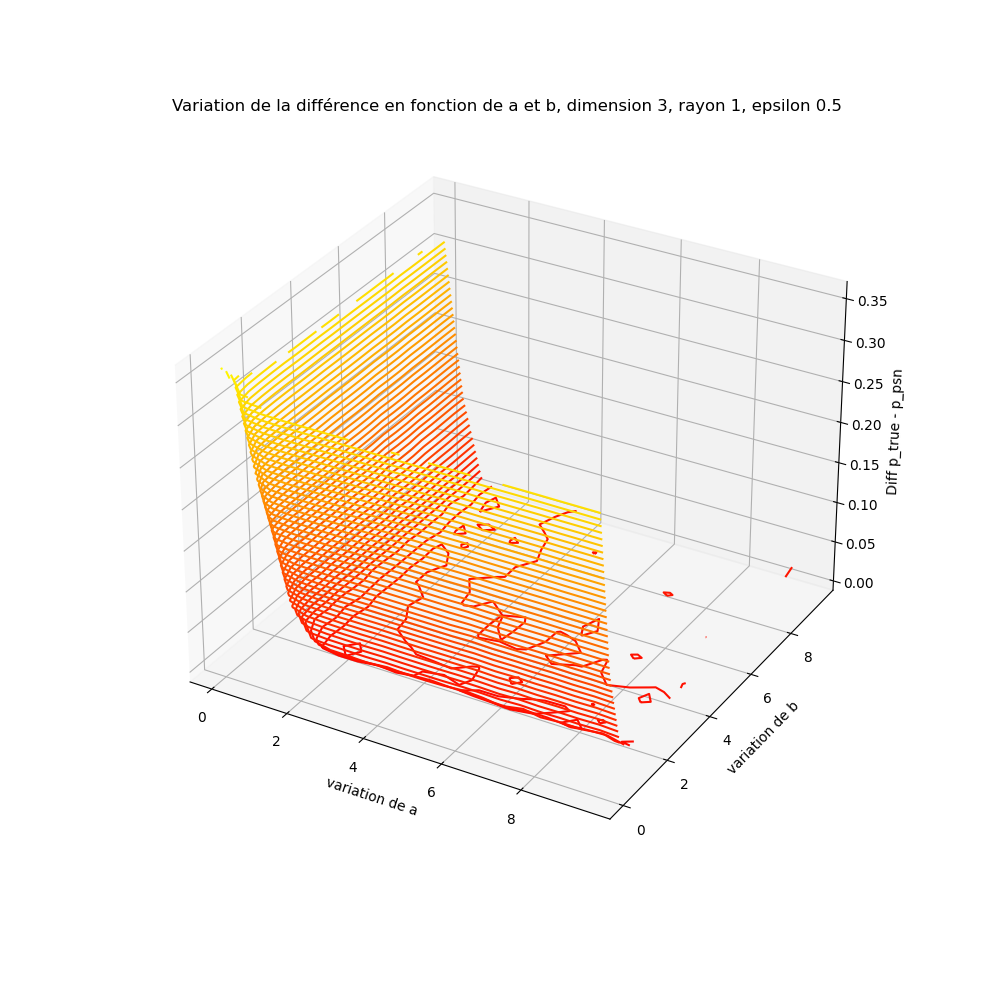

Text(0.5, 0.92, 'Variation de la différence en fonction de a et b, dimension 3, rayon 1, epsilon 0.5')

In [122]:
list_res_diff = [list_res[i][0] for i in range(len(list_res))]
true_list = []
for i in range(0, 20):
    liste = []
    for j in range(0, 20):
        liste.append(list_res_diff[i*20 + j])
    true_list.append(liste[:])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.contour3D(A, B, true_list, 50, cmap = 'autumn')
ax.set_xlabel('variation de a')
ax.set_ylabel('variation de b')
ax.set_zlabel('Diff p_true - p_psn')
ax.set_title('Variation de la différence en fonction de a et b, dimension 3, rayon 1, epsilon 0.5')

In [7]:
def plot_3D_variation_a_b_par_dim_3(min_var, max_var, nbre_var, rayon, epsilon, iterations):
    pas = (max_var - min_var) / nbre_var
    grid_2D = np.mgrid[min_var:max_var:pas, min_var:max_var:pas]
    ab = grid_2D.reshape(2, -1).T
    t = np.linspace(min_var, max_var - pas, nbre_var)
    A, B = np.meshgrid(t, t)
    list_res = []
    for i in range(len(ab)):
        list_res.append(diff_p_true_p_single_noise_par_dim_3_opti(ab[i][0], ab[i][1], epsilon, rayon, iterations))
        print("calcul fait: " + str(i))
    list_res_diff = [list_res[i][0] for i in range(len(list_res))]
    true_list = []
    for i in range(0, nbre_var):
        liste = []
        for j in range(0, nbre_var):
            liste.append(list_res_diff[i*nbre_var + j])
        true_list.append(liste[:])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    ax.contour3D(A, B, true_list, 50, cmap = 'autumn')
    ax.set_xlabel('variation de a')
    ax.set_ylabel('variation de b')
    ax.set_zlabel('Diff p_true - p_psn')
    ax.set_title('Variation de la différence en fonction de a et b, dimension 3, rayon ' + str(rayon) + ', epsilon ' + str(epsilon))
    

calcul fait: 0
calcul fait: 1
calcul fait: 2
calcul fait: 3
calcul fait: 4
calcul fait: 5
calcul fait: 6
calcul fait: 7
calcul fait: 8
calcul fait: 9
calcul fait: 10
calcul fait: 11
calcul fait: 12
calcul fait: 13
calcul fait: 14
calcul fait: 15
calcul fait: 16
calcul fait: 17
calcul fait: 18
calcul fait: 19
calcul fait: 20
calcul fait: 21
calcul fait: 22
calcul fait: 23
calcul fait: 24
calcul fait: 25
calcul fait: 26
calcul fait: 27
calcul fait: 28
calcul fait: 29
calcul fait: 30
calcul fait: 31
calcul fait: 32
calcul fait: 33
calcul fait: 34
calcul fait: 35
calcul fait: 36
calcul fait: 37
calcul fait: 38
calcul fait: 39
calcul fait: 40
calcul fait: 41
calcul fait: 42
calcul fait: 43
calcul fait: 44
calcul fait: 45
calcul fait: 46
calcul fait: 47
calcul fait: 48
calcul fait: 49
calcul fait: 50
calcul fait: 51
calcul fait: 52
calcul fait: 53
calcul fait: 54
calcul fait: 55
calcul fait: 56
calcul fait: 57
calcul fait: 58
calcul fait: 59
calcul fait: 60
calcul fait: 61
calcul fait: 62
ca

<IPython.core.display.Javascript object>


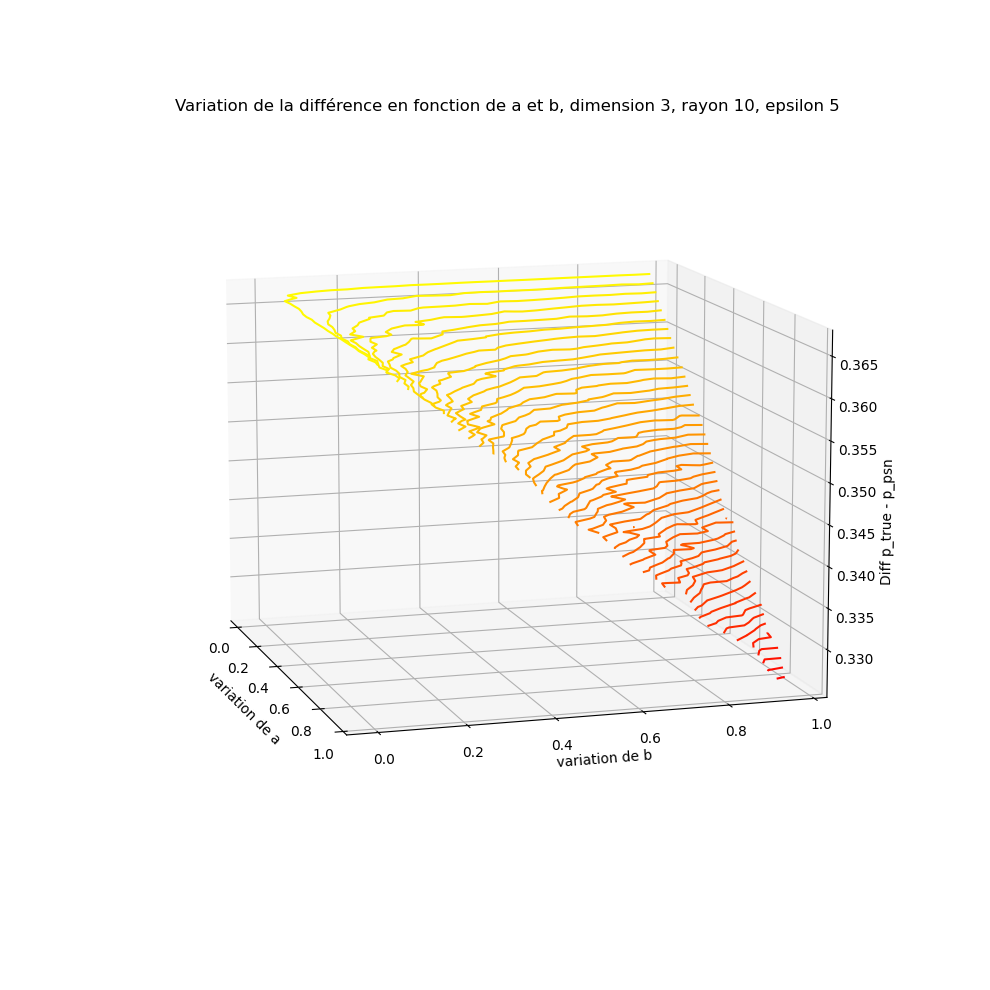

In [131]:
plot_3D_variation_a_b_par_dim_3(0.0001, 1, 25, 10, 5, 100000)

# Maintenant, a n-dimension

In [8]:
def visualisation_par_dim_3_par_rho(a, b, iterations):
    count_in_par = 0
    points_in_par = []
    points_in_par_2 = []
    count_in_par_2 = 0
    for count_loops in range(iterations):
        x = np.random.uniform(-100, 100)
        y = np.random.uniform(-100, 100)
        z = np.random.uniform(-2000, 2000)
        if z > (x**2)/(a**2) + (y**2)/(b**2):
            count_in_par += 1
            points_in_par.append((z, y, x))
        rho = math.sqrt(y**2 + x**2)
        if z > 0 and rho**2 < z:
            count_in_par_2 += 1
            points_in_par_2.append((z, y, x))
            
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    
    fig_2 = plt.figure(figsize=(10, 10))
    ax_2 = fig_2.gca(projection='3d')
    
    for point in points_in_par:
        ax.scatter(point[0], point[1], point[2], color = 'orange')
    for point in points_in_par_2:
        ax_2.scatter(point[0], point[1], point[2], color = 'orange')
        
    return (count_in_par, count_in_par_2)

<IPython.core.display.Javascript object>


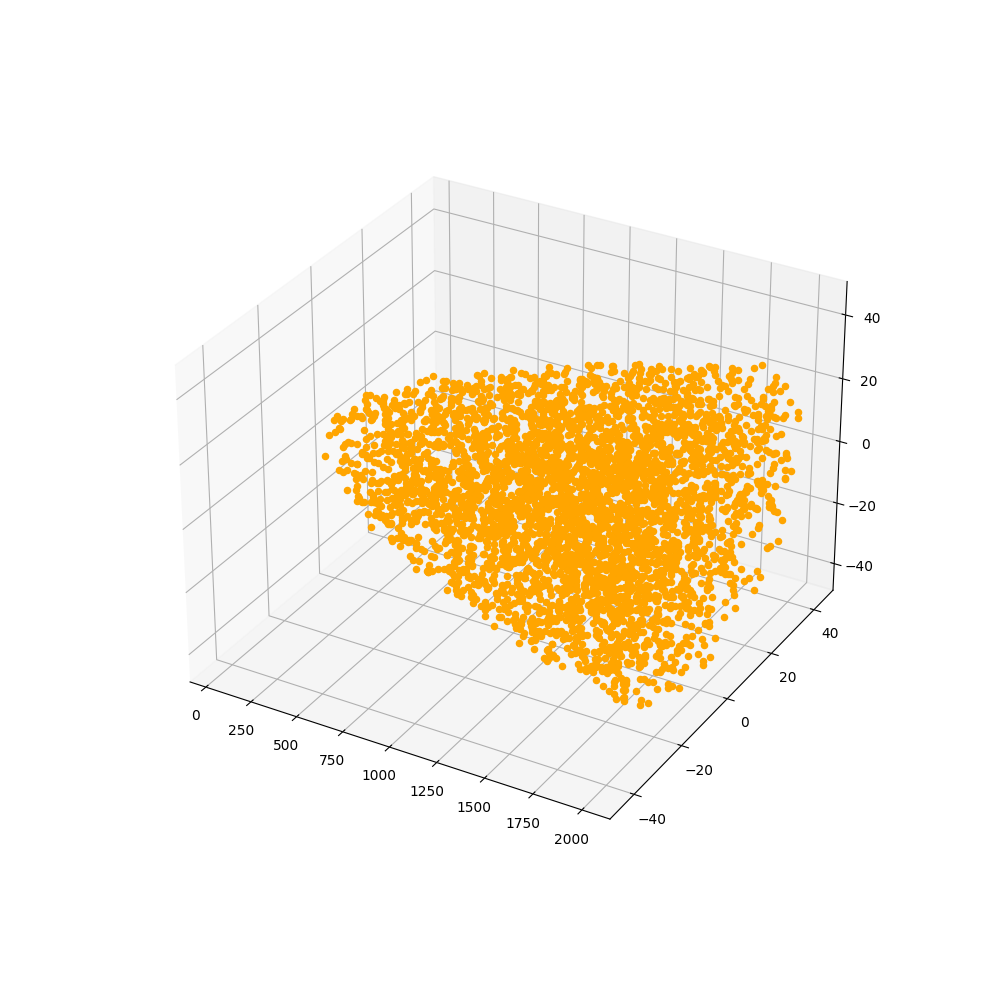

<IPython.core.display.Javascript object>


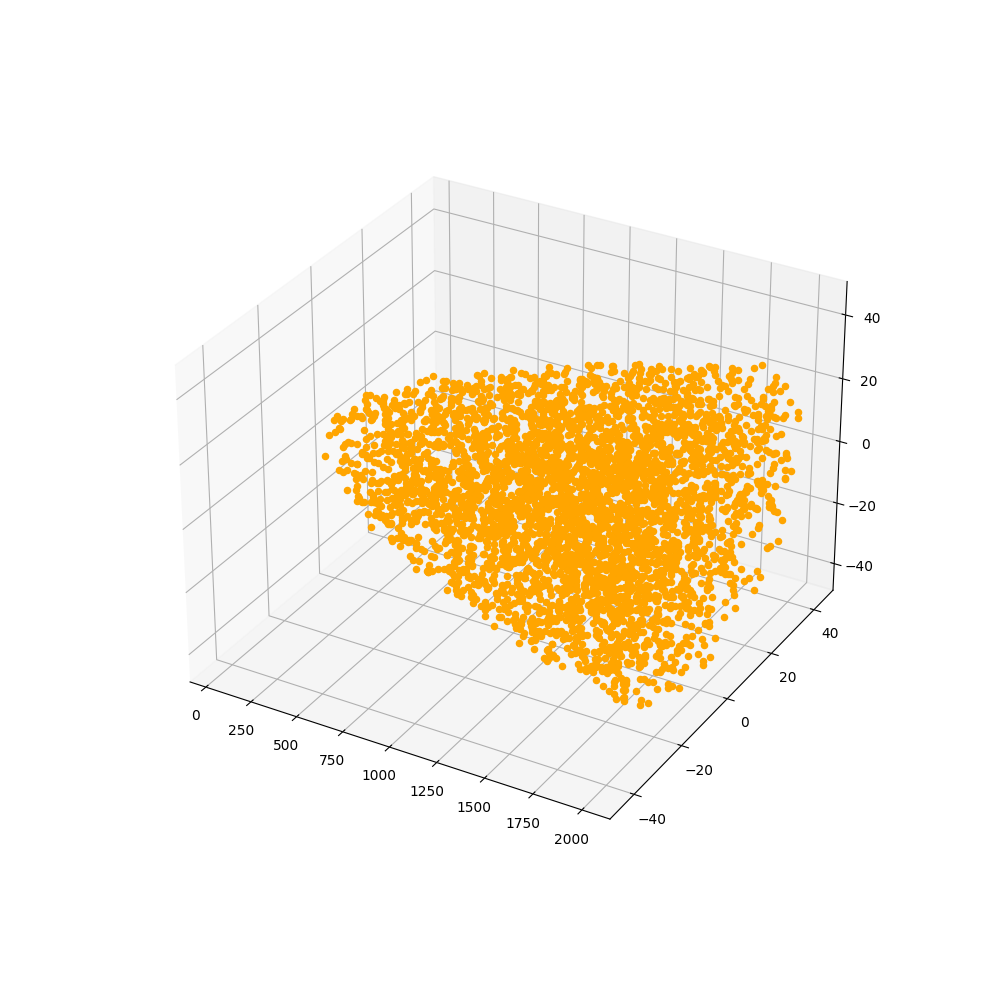

(4036, 4036)


In [17]:
print(visualisation_par_dim_3_par_rho(1, 1, 100000))

In [9]:
def visualisation_par_dim_2_par_rho(a, b, iterations):
    count_in_par = 0
    points_in_par = []
    for count_loops in range(iterations):
        x = np.random.uniform(-1000, 1000)
        y = np.random.uniform(-1000, 1000)
        
        z = x
        rho = math.sqrt(y**2)
        if z > 0 and rho**2 < z:
            count_in_par +=1
            points_in_par.append((x,y))
    i = 0
    for point in points_in_par:
        plt.plot(point[0], point[1], marker="o", markersize=2, markeredgecolor="red", markerfacecolor="green")
        
    plt.show()
        
    surf = np.power(2000, 2) * (count_in_par/iterations)
    return(surf)

<IPython.core.display.Javascript object>


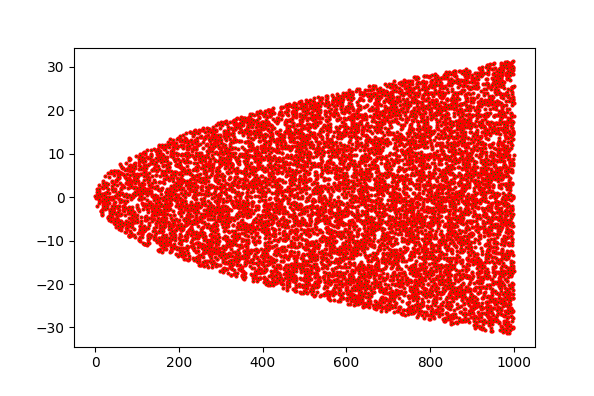

42228.0


In [11]:
print(visualisation_par_dim_2_par_rho(1, 1, 1000000))

In [10]:
def diff_p_true_p_single_noise_par_opti_n_dim(a_, b_, epsilon, rayon, iterations, dim):
    count_in_sphere = 0
    points_in_sphere = []
    count_in_par = 0
    points_in_par = []
    count_in_par_ptrue = 0
    count_not_in_par_ptrue = 0
    points_in_par_ptrue = []
    
    for count_loops in range(iterations):
        point = np.random.uniform(-rayon, rayon, dim)
        norm = np.linalg.norm(point)
        if norm < rayon:
            points_in_sphere.append(point)
            count_in_sphere +=1
    vol_boule = np.power(2*rayon, 3) * (count_in_sphere / iterations)
    if count_in_sphere == 0:
        print("erreur division par 0 a dim " + str(dim))
        return([0, 0, 0])
    else:
        
        for point in points_in_sphere:
            z = point[0]
            S = 0
            for i in range(len(point)-1):
                S += point[i + 1]**2
            rho = np.sqrt(S) 
            if z > 0 and rho**2 < z:
                count_in_par +=1
                points_in_par.append(point)
    
        p1 = 1 - count_in_par/count_in_sphere
    
        a = (dim + 1)/2
        b = 1/2
        x = 1 - (epsilon/(2*rayon))**2
        Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
        Psn = p1 - 1 + 2*(Vcap/vol_boule)
    
        for i in points_in_sphere:
            i[0] = i[0] + epsilon
    
        for point in points_in_sphere:
            z = point[0]
            S = 0
            for i in range(len(point)-1):
                S += point[i + 1]**2
            rho = np.sqrt(S) 
            if z > 0 and rho**2 < z:
                count_in_par_ptrue +=1
                points_in_par_ptrue.append(point)
            else:
                count_not_in_par_ptrue += 1
            
        vol_deplace = vol_boule*(count_not_in_par_ptrue/count_in_sphere)
    
        p_true = vol_deplace/vol_boule
    
        return(p_true - Psn, p_true, Psn)

In [31]:
diff_p_true_p_single_noise_par_opti_n_dim(1, 1, 5, 10, 100000, 3)

(0.32218654415981707, 0.9186771171860065, 0.5964905730261895)

In [11]:
def plot_variation_r_fixé_epsilon_var_dim_var(a_, b_, epsilon_min, epsilon_max, nbre_epsilon, rayon, iterations, dimensions):
    if epsilon_max >= rayon:
        print('erreur, rayon trop petit')
        return(0)
    else:
        epsilons = np.linspace(epsilon_min, epsilon_max, nbre_epsilon)
        fig, ax = plt.subplots()
        for dim in dimensions:
            liste = []
            for eps in epsilons:
                liste.append(diff_p_true_p_single_noise_par_opti_n_dim(a_, b_, eps, rayon, iterations, dim)[0])
            ax.plot(epsilons, liste[:], label = 'dim: ' + str(dim))
            ax.legend()
            print('dim ' + str(dim) + ' finie.')
        ax.set_xlabel("Epsilons")
        ax.set_ylabel('P_true - P_single_noise')
        ax.set_title('Différence entre P_true et P_single_noise, rayon = ' + str(rayon) + ', a dimensions variable, a = ' + str(a_) + ' b = ' + str(b_))

<IPython.core.display.Javascript object>


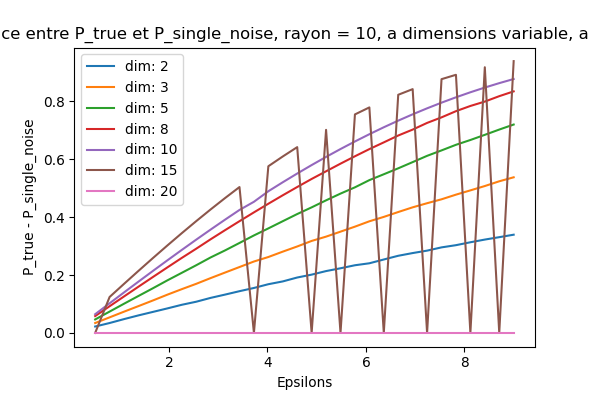

dim 2 finie.
dim 3 finie.
dim 5 finie.
dim 8 finie.
dim 10 finie.
erreur division par 0 a dim 15
erreur division par 0 a dim 15
erreur division par 0 a dim 15
erreur division par 0 a dim 15
erreur division par 0 a dim 15
erreur division par 0 a dim 15
erreur division par 0 a dim 15
erreur division par 0 a dim 15
dim 15 finie.
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0 a dim 20
erreur division par 0

In [33]:
plot_variation_r_fixé_epsilon_var_dim_var(1, 1, 0.5, 9, 30, 10, 100000, [2, 3, 5, 8, 10, 15, 20])

In [26]:
#À changer car on doit trouver comment le faire varier en fonction de a et b, ce qui n'est pas le cas a n-dim encore
def plot_3D_variation_a_b_par_n_dim(min_var, max_var, nbre_var, rayon, epsilon, iterations, dims, cmaps):
    pas = (max_var - min_var) / nbre_var
    grid_2D = np.mgrid[min_var:max_var:pas, min_var:max_var:pas]
    ab = grid_2D.reshape(2, -1).T
    t = np.linspace(min_var, max_var - pas, nbre_var)
    A, B = np.meshgrid(t, t)
    lixt_r = 0
    for dim in dims:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca(projection='3d')
        list_res = []
        for i in range(len(ab)):
            list_res.append(diff_p_true_p_single_noise_par_opti_n_dim(ab[i][0], ab[i][1], epsilon, rayon, iterations, dim))
            print("calcul " + str(i) + ' fini.')
        list_res_diff = [list_res[i][0] for i in range(len(list_res))]
        true_list = []
        for i in range(0, nbre_var):
            liste = []
            for j in range(0, nbre_var):
                liste.append(list_res_diff[i*nbre_var + j])
            true_list.append(liste[:])
            
        ax.contour3D(A, B, true_list[:], 50, cmap = cmaps[lixt_r])
        lixt_r += 1
        ax.set_xlabel('variation de a')
        ax.set_ylabel('variation de b')
        ax.set_zlabel('Diff p_true - p_psn')
        ax.set_title('Variation de la différence en fonction de a et b, dimension ' + str(dim) + ', rayon ' + str(rayon) + ', epsilon ' + str(epsilon))
        print('Dim finie')

<IPython.core.display.Javascript object>


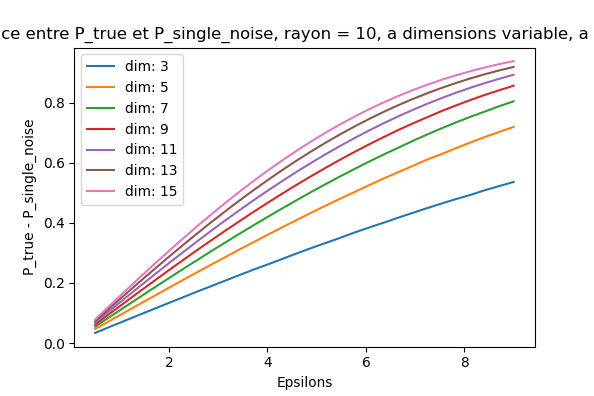

dim 3 finie.
dim 5 finie.
dim 7 finie.
dim 9 finie.
dim 11 finie.
dim 13 finie.
dim 15 finie.


In [27]:
plot_variation_r_fixé_epsilon_var_dim_var(1, 1, 0.5, 9, 30, 10, 1000000, [3, 5, 7, 9, 11, 13, 15])